In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index = pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
#dropping unnecessary columns 
df_index.drop(columns = ["Unnamed: 0","year","month"],axis = 1,inplace = True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [4]:
#checking the null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

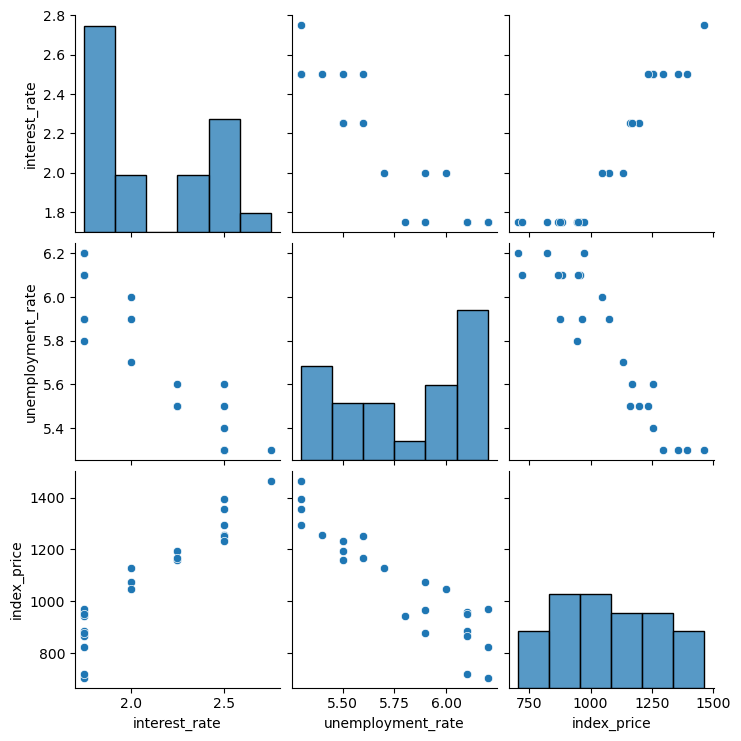

In [6]:
#visualization
import seaborn as sns 
sns.pairplot(df_index)

In [11]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

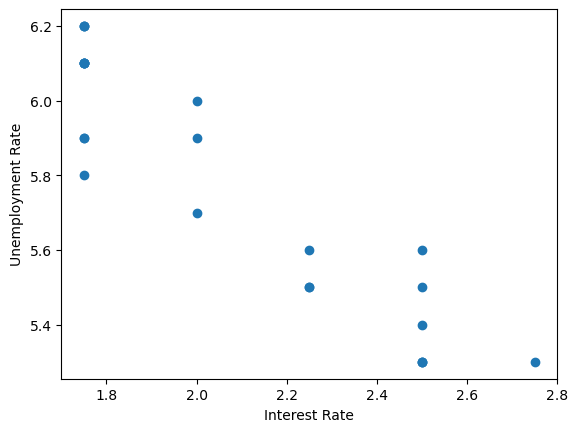

In [13]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'])
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [14]:
#independent and dependent features
x = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [15]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

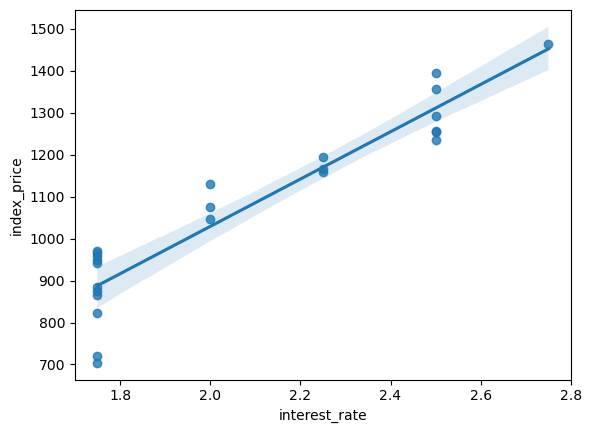

In [19]:
import seaborn as sns 
sns.regplot(x = df_index['interest_rate'], y = df_index['index_price'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

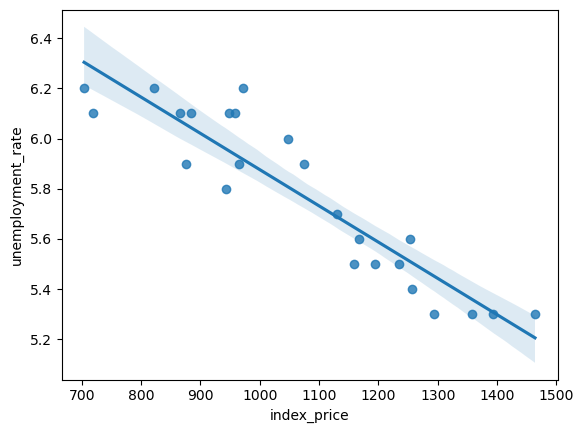

In [22]:
sns.regplot(x=df_index['index_price'], y = df_index['unemployment_rate'])

In [24]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
#multiple linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [26]:
#cross_val_score
from sklearn.model_selection import cross_val_score
validation = cross_val_score(regression,x_train,y_train,scoring = 'neg_mean_squared_error',cv=3)
np.mean(validation)

-5914.828180162388

In [29]:
print("Coefficient or slope :",regression.coef_)

Coefficient or slope : [  88.27275507 -116.25716066]


In [30]:
print("intercept :",regression.intercept_)

intercept : 1053.4444444444443


In [31]:
#prediction
y_pred = regression.predict(x_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [33]:
#performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error :",mse)
print("Mean Absolute Error :",mae)
print("Root Mean Squared Error :",rmse)
score = r2_score(y_test,y_pred)
print("R2_score:",score)
adjusted_r2_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)*x_test.shape[1]-1)
print("Adjusted R2 Score :",adjusted_r2_score)

Mean Squared Error : 5793.762887712579
Mean Absolute Error : 59.935781523235526
Root Mean Squared Error : 76.11677139574812
R2_score: 0.8278978091457142
Adjusted R2 Score : 0.9217717314298701


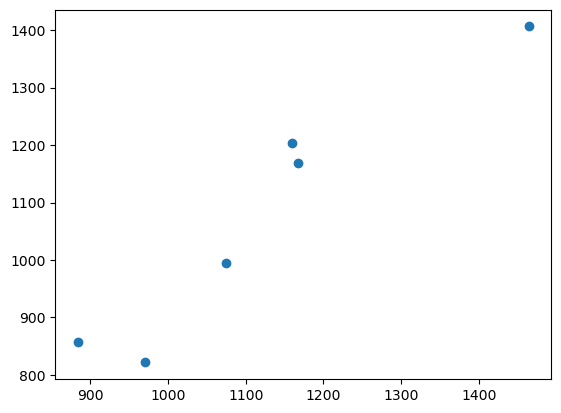

In [34]:
#assumptions
plt.scatter(y_test,y_pred)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


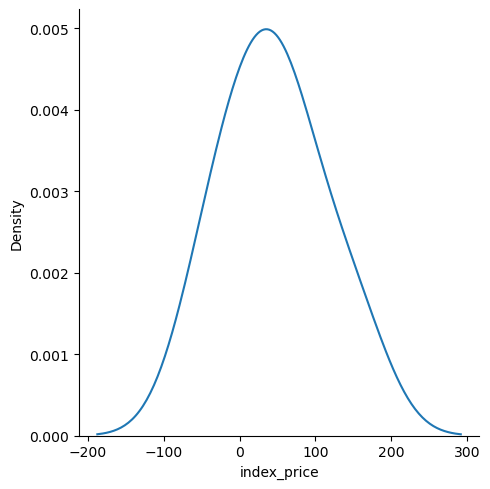

In [36]:
residual = y_test-y_pred
print(residual)
sns.displot(residual,kind = 'kde')

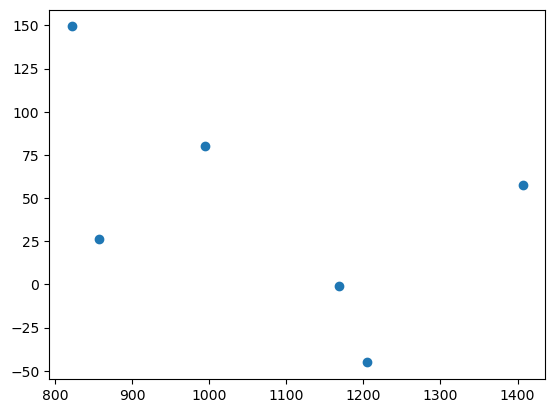

In [37]:
plt.scatter(y_pred,residual)

In [39]:
#OLS-ordinary least square
import statsmodels.api as sm
model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 06 Dec 2025   Prob (F-statistic):                       0.754
Time:                        23:18:37   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""